In [2]:
import numpy as np
import pandas as pd
from modules import *

In [3]:
DBAR, DCIR, SAVEPATH, FILEPATH = dados("dados_sistema13B_EC3_CasoBase.txt")

In [13]:

somas_perdas = (
        DCIR.groupby("BDE")["CAP(PU)"].expanding().sum().droplevel(0)
        + DCIR.groupby("BPARA")["CAP(PU)"].expanding().sum().droplevel(0)
    ).reset_index(name="Perdas (MW)")
print(somas_perdas)


    index  Perdas (MW)
0       0         2.00
1       1         3.00
2       2         2.00
3       3         2.00
4       4         4.00
5       5         5.00
6       6         5.00
7       7         3.00
8       8         1.64
9       9         3.28
10     10         1.64
11     11         2.82
12     12         1.64
13     13         1.20
14     14         2.40
15     15         2.40
16     16         1.80
17     17         1.80
18     18         3.00
19     19         2.40
20     20         3.00


In [3]:
def regioes_v(FILEPATH):
  regioes = {}
  with open(FILEPATH + "_config.txt", "r") as file:
      linhas = file.read().splitlines()

      for linha in linhas:
          # Avaliar cada linha para transformar em uma lista
          try:
            nome, valores = linha.strip("\n").split("=")
            print(nome)
            print(valores)
            print(eval(valores))
            regioes[nome] = eval(valores)
          except ValueError:
            continue
             
      
          

  # Acessar as regioes
  R500 = regioes.get("R500", None)
  R440 = regioes.get("R440", None)
  R345 = regioes.get("R345", None)
  R230 = regioes.get("R230", None)
  R138 = regioes.get("R138", None)
  return R500, R440, R345, R230, R138


In [58]:
R500, R440, R345, R230, R138 = regioes_v(FILEPATH)


R500
[1]
[1]
R138
[2,3,4,5,6]
[2, 3, 4, 5, 6]


In [59]:
print(f"R500: {R500}")
print(f"R440: {R440}")
print(f"R345: {R345}")
print(f"R230: {R230}")
print(f"R138: {R138}")

R500: [1]
R440: None
R345: None
R230: None
R138: [2, 3, 4, 5, 6]


In [16]:
contingencia = any(DCIR.index[DCIR["LIG(L)DESL(D)"] == "D"])
print(contingencia)

True


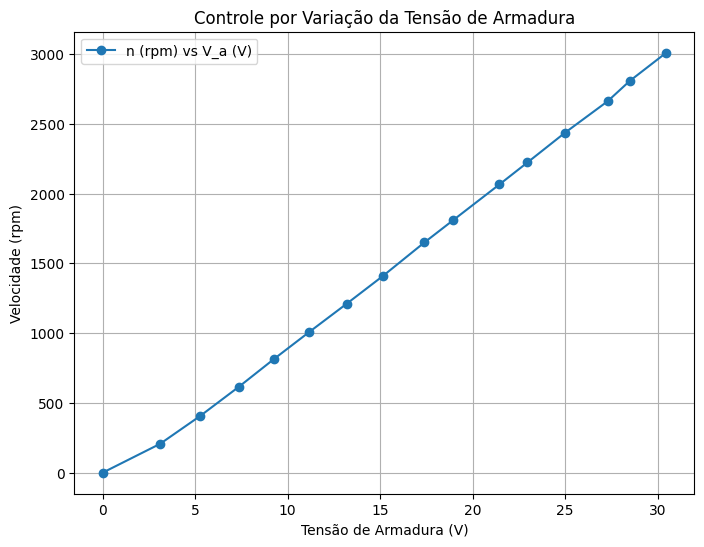

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Dados para controle por variação da tensão de armadura
Va = [0, 3.11, 5.27, 7.38, 9.28, 11.15, 13.19, 15.14, 17.40, 18.93, 21.45, 22.97, 25.00, 27.30, 28.50, 30.47]
n_armadura = [0, 207, 406, 617, 816, 1006, 1210, 1408, 1650, 1807, 2065, 2223, 2436, 2661, 2807, 3009]

# Dados para controle por enfraquecimento de campo
I_campo = [0.79, 0.685, 0.632]
n_campo = [3215, 3450, 3615]

# Criando os gráficos
plt.figure(figsize=(8, 6))

# Gráfico para controle por variação da tensão de armadura
#plt.subplot(1, 2, 1)
plt.plot(Va, n_armadura, 'o-', label='n (rpm) vs V_a (V)')
plt.title('Controle por Variação da Tensão de Armadura')
plt.xlabel('Tensão de Armadura (V)')
plt.ylabel('Velocidade (rpm)')
plt.grid(True)
plt.legend()



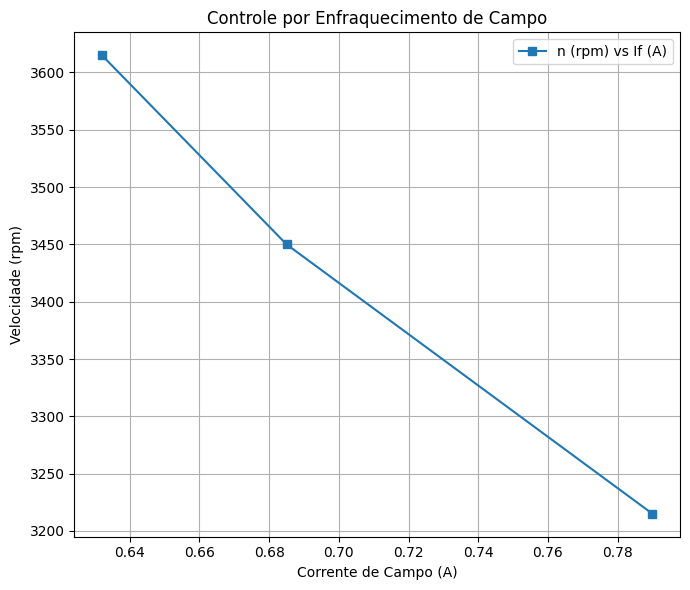

In [10]:
# Gráfico para controle por enfraquecimento de campo
#plt.subplot(1, 2, 2)
plt.figure(figsize=(7, 6))
plt.plot(I_campo, n_campo, 's-', label='n (rpm) vs If (A)')
plt.title('Controle por Enfraquecimento de Campo')
plt.xlabel('Corrente de Campo (A)')
plt.ylabel('Velocidade (rpm)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()